#### Packages required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

#### Loading Data

In [2]:
cust=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Python Foundation Case Study 1 - Retail Case Study/Customer.csv',sep=',')
prod=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Python Foundation Case Study 1 - Retail Case Study/prod_cat_info.csv',sep=',')
trans=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Python Foundation Case Study 1 - Retail Case Study/Transactions.csv',sep=',')

In [3]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


In [4]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


In [5]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


#### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [6]:
# joining customer data with transaction data
cust_trans=pd.merge(left=trans,right=cust,left_on='cust_id',right_on='customer_Id',how='left')

In [7]:
# Final merged data(customer+transaction+product)
Customer_Final=pd.merge(left=cust_trans,right=prod,left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'],how='left')

In [8]:
Customer_Final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [9]:
# Removing redundant columns
Customer_Final.drop(columns=['customer_Id','prod_sub_cat_code','prod_subcat_code','prod_cat_code'],
                    inplace=True)

In [10]:
# Data type conversion
Customer_Final.transaction_id = Customer_Final.transaction_id.astype(object)
Customer_Final.cust_id = Customer_Final.cust_id.astype(object)
Customer_Final.city_code = Customer_Final.city_code.astype(object) 

In [11]:
# making dates data consistent
Customer_Final.tran_date = Customer_Final.tran_date.str.replace('/','-')

In [12]:
# Handling Dates
Customer_Final.tran_date=pd.to_datetime(Customer_Final.tran_date,format='%d-%m-%Y')
Customer_Final.DOB=pd.to_datetime(Customer_Final.DOB,format='%d-%m-%Y')


#### 2. Prepare a summary report for the merged data set.
        a. Get the column names and their corresponding data types 
        b. Top/Bottom 10 observations
        c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
        d. Frequency tables for all the categorical variables

In [13]:
#  a. Get the column names and their corresponding data types
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  23053 non-null  object        
 1   cust_id         23053 non-null  object        
 2   tran_date       23053 non-null  datetime64[ns]
 3   Qty             23053 non-null  int64         
 4   Rate            23053 non-null  int64         
 5   Tax             23053 non-null  float64       
 6   total_amt       23053 non-null  float64       
 7   Store_type      23053 non-null  object        
 8   DOB             23053 non-null  datetime64[ns]
 9   Gender          23044 non-null  object        
 10  city_code       23045 non-null  object        
 11  prod_cat        23053 non-null  object        
 12  prod_subcat     23053 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 2.5+ MB


In [14]:
#  b. Top 10 observations
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,2014-02-28,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
1,29258453508,270384,2014-02-27,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,Computers
2,51750724947,273420,2014-02-24,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
3,93274880719,271509,2014-02-24,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0,Home and kitchen,Bath
4,51750724947,273420,2014-02-23,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,DIY
5,97439039119,272357,2014-02-23,-2,-824,173.040,-1821.040,TeleShop,1982-10-09,F,6.0,Electronics,Personal Appliances
6,45649838090,273667,2014-02-22,-1,-1450,152.250,-1602.250,e-Shop,1981-05-29,M,9.0,Home and kitchen,Bath
7,22643667930,271489,2014-02-22,-1,-1225,128.625,-1353.625,TeleShop,1971-04-21,M,9.0,Home and kitchen,Tools
8,79792372943,275108,2014-02-22,-3,-908,286.020,-3010.020,MBR,1971-11-04,F,8.0,Clothing,Kids
9,50076728598,269014,2014-02-21,-4,-581,244.020,-2568.020,e-Shop,1979-11-27,F,3.0,Electronics,Personal Appliances


In [15]:
#  b. Bottom 10 observations
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,49882891062,271982,2011-01-25,4,1330,558.600,5878.600,e-Shop,1976-08-10,M,8.0,Books,Non-Fiction
23044,14787475597,273982,2011-01-25,5,969,508.725,5353.725,e-Shop,1991-10-12,M,4.0,Electronics,Mobiles
23045,50691119572,273031,2011-01-25,1,1148,120.540,1268.540,TeleShop,1980-01-17,F,8.0,Books,DIY
23046,40893803228,272049,2011-01-25,3,1077,339.255,3570.255,e-Shop,1975-06-28,F,6.0,Home and kitchen,Bath
23047,30856003613,266866,2011-01-25,2,444,93.240,981.240,TeleShop,1974-04-18,M,4.0,Footwear,Kids
23048,94340757522,274550,2011-01-25,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,Books,Academic
23049,89780862956,270022,2011-01-25,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,Clothing,Mens
23050,85115299378,271020,2011-01-25,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,Home and kitchen,Furnishing
23051,72870271171,270911,2011-01-25,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,Children
23052,77960931771,271961,2011-01-25,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,Children


In [16]:
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
Customer_Final.select_dtypes(['int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
Qty,23053.0,2.432395,2.268406,-5.000,1.00,3.00,4.000,5.0
Rate,23053.0,636.369713,622.363498,-1499.000,312.00,710.00,1109.000,1500.0
Tax,23053.0,248.667192,187.177773,7.350,98.28,199.08,365.715,787.5
total_amt,23053.0,2107.308002,2507.561264,-8270.925,762.45,1754.74,3569.150,8287.5


In [17]:
# d. Frequency tables for all the categorical variables
Customer_Final.select_dtypes('object').columns

Index(['transaction_id', 'cust_id', 'Store_type', 'Gender', 'city_code',
       'prod_cat', 'prod_subcat'],
      dtype='object')

In [18]:
# customerID freq table
Customer_Final.cust_id.value_counts()

269449    13
268819    13
275252    12
274227    12
268663    12
          ..
269582     1
268407     1
269587     1
272865     1
268965     1
Name: cust_id, Length: 5506, dtype: int64

In [19]:
Customer_Final.transaction_id.value_counts()

426787191      4
4170892941     4
32263938079    4
63687553623    3
93438842631    3
              ..
46052289808    1
26946562074    1
40312863535    1
34425626782    1
31598936063    1
Name: transaction_id, Length: 20878, dtype: int64

In [20]:
Customer_Final.Store_type.value_counts()

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

In [21]:
Customer_Final.Gender.value_counts()

M    11811
F    11233
Name: Gender, dtype: int64

In [22]:
Customer_Final.prod_cat.value_counts()

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

In [23]:
Customer_Final.prod_subcat.value_counts()

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Comics                 1031
Mobiles                1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

#### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

##### A:Frequency plot for all categorical variables.

In [24]:

def fn_create_freq_plot(x):
    plt.figure(figsize=(10,4))
    plt.title('Frequency plot for ' + x.name )
    x.value_counts().plot(kind='bar',edgecolor='tomato',color='steelblue')
    plt.show()

In [25]:
cat=[ 'Store_type', 'Gender', 'city_code',
       'prod_cat', 'prod_subcat']
# Very High cardinality for CustomerID and TransactionID varaible,no frequency plot for these variables

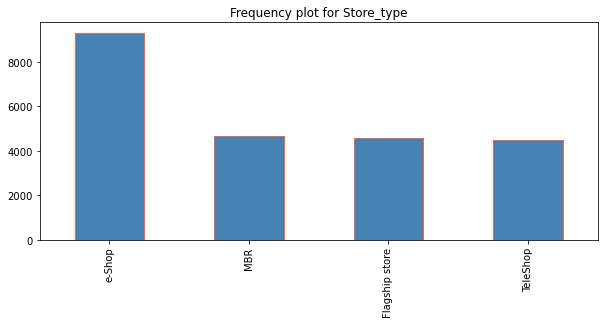

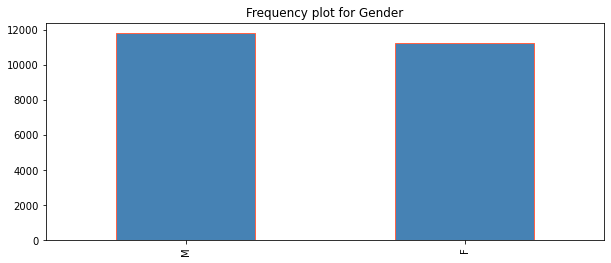

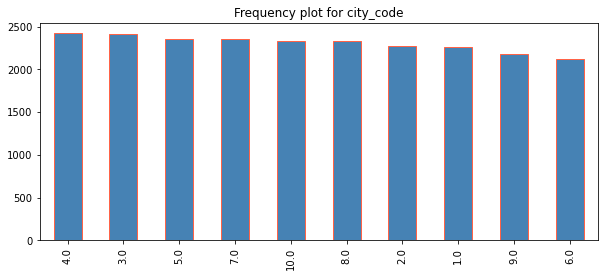

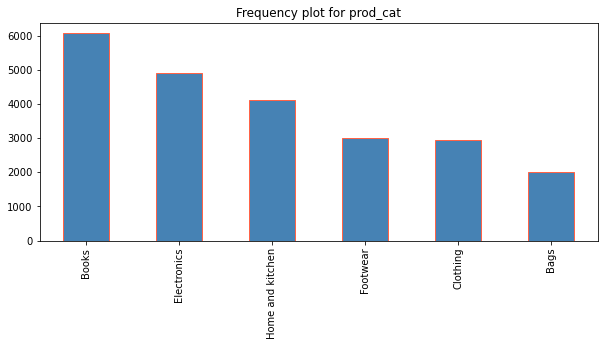

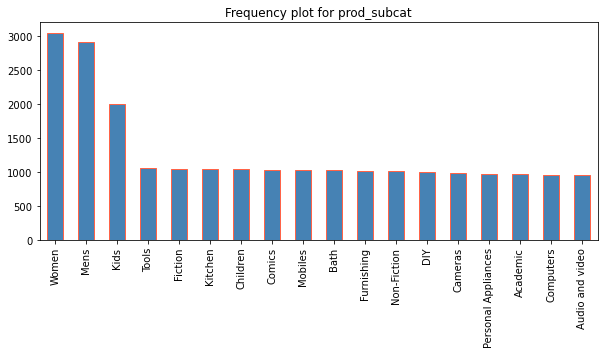

In [26]:
Customer_Final.loc[:,cat].apply(lambda x:fn_create_freq_plot(x))
plt.show()

##### B:Histogram for all continuous variables

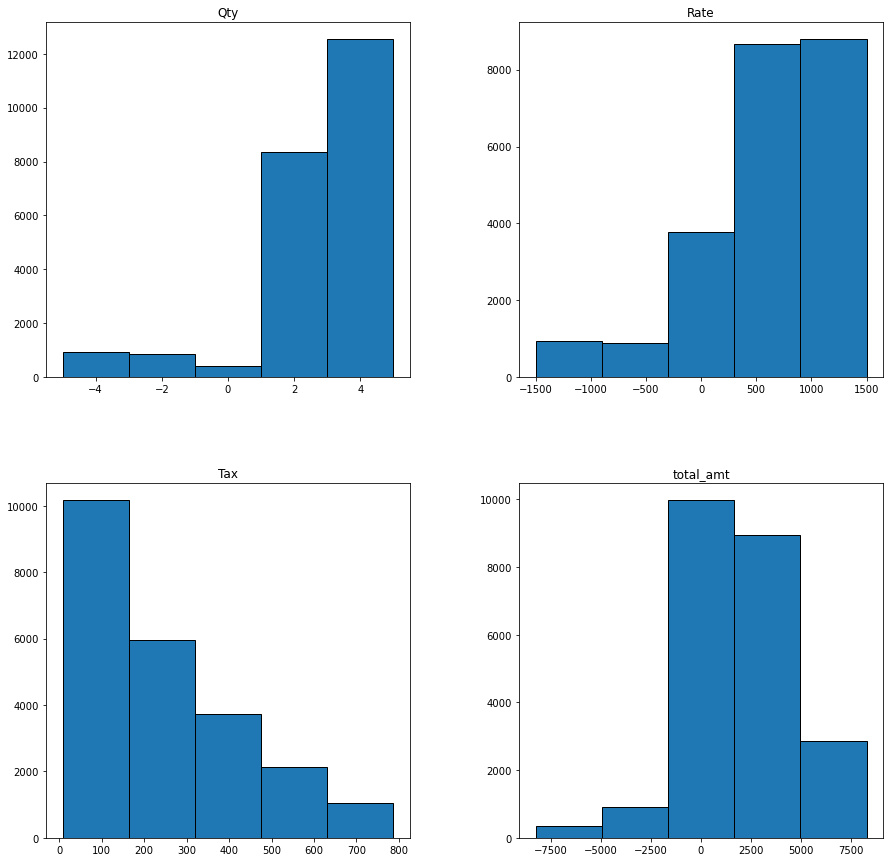

In [27]:
# Using matplotlib's hist
Customer_Final.select_dtypes( ['float64', 'int64'] ).hist(bins=5, figsize=(15,15),edgecolor='black',grid=False)
plt.show()

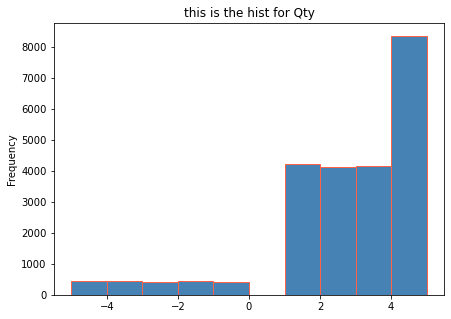

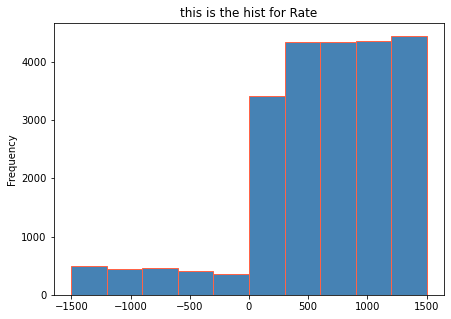

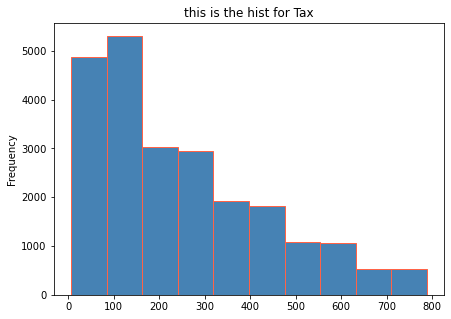

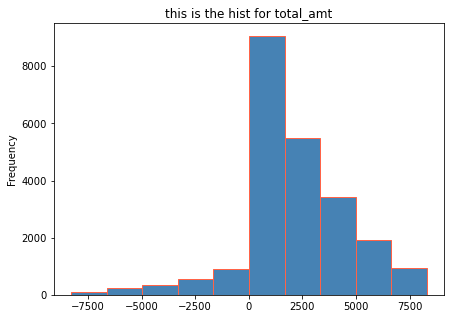

In [28]:
# using user defined function
def fn_create_hist( x ):
    
    plt.figure( figsize = (7, 5))
    plt.title('this is the hist for ' + x.name )
    x.plot( kind = 'hist',edgecolor='tomato',color='steelblue')
    plt.show()

Customer_Final.select_dtypes( ['float64', 'int64'] ).apply( lambda x: fn_create_hist(x) )
plt.show()

#### 4. Calculate the following information using the merged dataset :
    a. Time period of the available transaction data
    b. Count of transactions where the total amount of transaction was negative

In [29]:
# a:Time period of the available transaction data
print('Time period of the available transaction data:',(Customer_Final.tran_date.max()-Customer_Final.tran_date.min()).days,'days')

Time period of the available transaction data: 1130 days


In [30]:
# b: Count of transactions where the total amount of transaction was negative
uniq_trans=Customer_Final.groupby('transaction_id')['total_amt'].sum()
print('Count of transactions where the total amount of transaction was negative:',
      uniq_trans[uniq_trans<0].count())

Count of transactions where the total amount of transaction was negative: 117


#### 5. Analyze which product categories are more popular among females vs male customers.

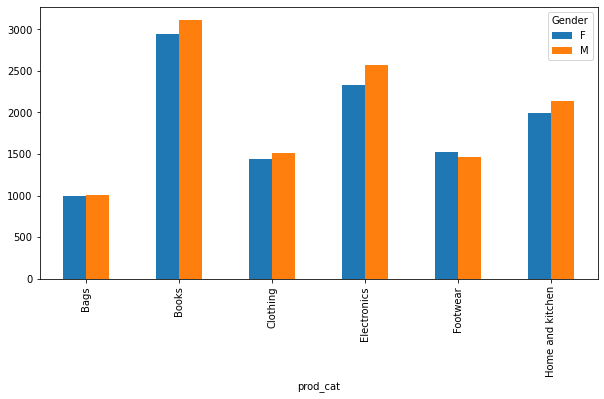

In [31]:
pd.crosstab(index=Customer_Final.prod_cat,columns=Customer_Final.Gender).plot(kind='bar',figsize=(10,5))
plt.show()

In [32]:
# Inference
# Bag, Books, Clothing, Electronics and Home and kitchen are more popular in male compared to female.
# Footwear is more popular in female compared to male.

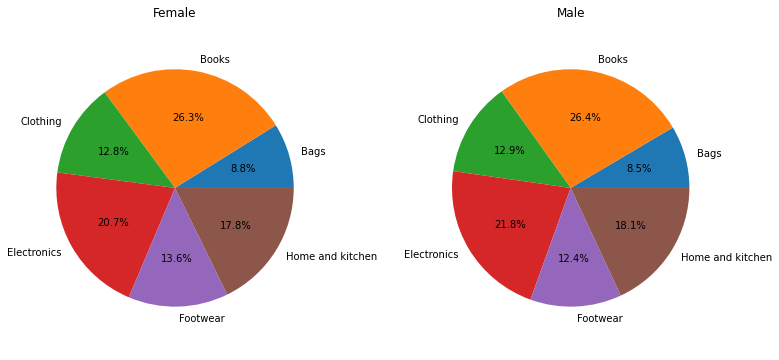

In [33]:
pd.crosstab(index=Customer_Final.prod_cat,columns=Customer_Final.Gender).plot(kind='pie',
                                                                              subplots=True,
                                                                                 figsize=(13,8),
                                                                                  layout=(1,2),
                                                                                 legend=0,
                                                                                 autopct='%.1f%%',
                                                                                  ylabel='',
                                                                                  title=['Female','Male'],
                                                                                  radius=0.9
                                                                                 )
plt.show()

#### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [34]:
city=pd.crosstab(Customer_Final.city_code,columns='count').sort_values(by='count',ascending=False)

In [35]:
(city.divide(Customer_Final.city_code.count())*100).head(1)

col_0,count
city_code,
4.0,10.509872


In [49]:
Customer_Final.city_code.value_counts().head(1)/Customer_Final.city_code.count()

4.0    0.105099
Name: city_code, dtype: float64

In [46]:
Customer_Final.city_code.shape[0]

23053

#### 7.Which store type sells the maximum products by value and by quantity?

In [37]:
Customer_Final.groupby('Store_type')[['Qty','total_amt']].sum().sort_values(by=['Qty','total_amt'],ascending=False).head(1)

,Qty,total_amt
Store_type,,
e-Shop,22763,19824816.05


#### 8.What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [38]:
Customer_Final[(Customer_Final.prod_cat.isin(['Electronics','Clothing']))&
               (Customer_Final.Store_type=='Flagship store')].groupby('prod_cat')['total_amt'].sum()

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: total_amt, dtype: float64

#### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [39]:
print('Total amount earned from Male customers under the Electronics category: ',Customer_Final.loc[(Customer_Final.Gender=='M')&(Customer_Final.prod_cat=='Electronics'),'total_amt'].sum())

Total amount earned from Male customers under the Electronics category:  5703109.424999999


#### 10.How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [40]:
Q10=Customer_Final[~(Customer_Final.total_amt<0)].groupby('cust_id')['transaction_id'].count().sort_values(ascending=False)
print('Customers having more than 10 unique positive transactions:',Q10[Q10>10].count())

Customers having more than 10 unique positive transactions: 6


#### 11. For all customers aged between 25 - 35, find out:
    a. What was the total amount spent for “Electronics” and “Books” product categories?
    b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [41]:
# Getting age for all customers:
Customer_Final['Age']=round((Customer_Final.tran_date -Customer_Final.DOB).dt.days/365.25,2)

In [42]:
#a
Customer_Final[(Customer_Final.prod_cat.isin(['Electronics','Books']))&
              (Customer_Final.Age.between(25,35))].groupby('prod_cat')['total_amt'].sum()

prod_cat
Books          5491873.205
Electronics    4622198.425
Name: total_amt, dtype: float64

In [43]:
# b
Customer_Final.loc[(Customer_Final.tran_date.between('2014-01-01','2014-03-01'))&
              (Customer_Final.Age.between(25,35)),'total_amt'].sum()

995938.71